# Proyecto: Conexión a una base de datos tipo SQL administrada por `MySQL`

## Mostraremos que usando `pandas` podemos hacer consultas con un formato más simple e intuitivo del que ofrece el lenguaje `SQL`

In [1]:
import pandas as pd

# cargamos la libreria para conectar bases de datos tipo 'SQL'
import pymysql

# en caso de no tener la libreria, la podemos instalar con:
# pip install pymysql

## Creamos la conexion a la base de datos:

In [2]:
# Creamos la conexión con la base de datos usando el administrador 'MySQL':
conexion = pymysql.connect(
    host='127.0.0.1',#'localhost',
    port=3306, 
    user='root', 
    passwd='',  # <- password de la base de datos
    db='platzi' # <- nombre de la base de datos
    )

cursor = conexion.cursor()

## Información de la base de datos:

### El Schema `platzi` tiene 2 tablas `alumnos` y `carreras`

## Hacemos consultas en lenguaje SQL y las convertimos a DataFrames de pandas:

In [3]:
# Extraemos todos los campos de la tabla 'alumnos':
query1 = '''
SELECT * 
FROM platzi.alumnos;
'''

cursor.execute(query1)

# Pasamos la consulta a un DataFrame:
df1 = pd.read_sql(query1, conexion)
df1.head()

,id,nombre,apellido,email,colegiatura,fecha_incorporacion,carrera_id,tutor_id
0,1,Wanda,Billington,wbillington0@nsw.gov.au,5000.0,2020-05-17 22:49:29,23,9
1,2,Blayne,Wakeley,bwakeley1@google.cn,2500.0,2018-09-01 17:51:49,40,26
2,3,Hilde,Matiewe,hmatiewe2@hibu.com,2300.0,2020-07-18 00:03:21,48,25
3,4,Leanna,None,ldusey3@ebay.co.uk,2000.0,2018-02-05 17:28:38,36,14
4,5,Maire,Garnall,mgarnall4@artisteer.com,4800.0,2020-08-04 03:43:57,14,7


In [4]:
# Extraemos todos los campos de la tabla 'carreras':
query2 = '''
SELECT * 
FROM platzi.carreras;
'''

cursor.execute(query2)

# Pasamos la consulta a un DataFrame:
df2 = pd.read_sql(query2, conexion)
df2.head()

,id,carrera,fecha_alta,vigente
0,1,Negocios y administración,2017-05-28 06:42:45,1
1,2,Administración y gestión de empresas,2016-03-24 13:52:17,0
2,3,Contabilidad y fiscalización,2018-10-29 18:33:57,1
3,4,"Finanzas, banca y seguros",2020-05-11 02:05:57,0
4,5,Mercadotecnia y publicidad,2020-03-20 23:53:23,0


In [5]:
# Extraemos sólo algunos campos de un LEFT JOIN entre las tablas 'alumnos' y 'carreras':
query3 = '''
SELECT nombre, apellido, email, colegiatura, fecha_incorporacion, tutor_id, carrera, vigente 
FROM platzi.alumnos 
LEFT JOIN platzi.carreras 
ON alumnos.carrera_id = carreras.id;
'''

cursor.execute(query3)

# Pasamos la consulta a un DataFrame:
df3 = pd.read_sql(query3, conexion)
df3.head()

,nombre,apellido,email,colegiatura,fecha_incorporacion,tutor_id,carrera,vigente
0,Wanda,Billington,wbillington0@nsw.gov.au,5000.0,2020-05-17 22:49:29,9,"Ingeniería industrial, mecánica, electrónica y...",1
1,Blayne,Wakeley,bwakeley1@google.cn,2500.0,2018-09-01 17:51:49,26,"Formación docente para educación básica, nivel...",0
2,Hilde,Matiewe,hmatiewe2@hibu.com,2300.0,2020-07-18 00:03:21,25,"Didáctica, pedagogía y currículo",1
3,Leanna,None,ldusey3@ebay.co.uk,2000.0,2018-02-05 17:28:38,14,Educación,1
4,Maire,Garnall,mgarnall4@artisteer.com,4800.0,2020-08-04 03:43:57,7,Ciencias de la información,1


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   nombre               1000 non-null   object        
 1   apellido             846 non-null    object        
 2   email                1000 non-null   object        
 3   colegiatura          1000 non-null   float64       
 4   fecha_incorporacion  1000 non-null   datetime64[ns]
 5   tutor_id             1000 non-null   int64         
 6   carrera              1000 non-null   object        
 7   vigente              1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 62.6+ KB


In [7]:
# Guarda datos en CSV:
df3.to_csv('./db/New_Tabla.csv', header=True, index=False)

## En los siguientes ejemplos podemos ver que usando `pandas` podemos extraer información de la data de forma más simple e intuitiva:

In [8]:
# Selección de un renglon:
df3.iloc[1:2]

,nombre,apellido,email,colegiatura,fecha_incorporacion,tutor_id,carrera,vigente
1,Blayne,Wakeley,bwakeley1@google.cn,2500.0,2018-09-01 17:51:49,26,"Formación docente para educación básica, nivel...",0


In [9]:
# Selección de varios renglones:
df3.iloc[2:5]

,nombre,apellido,email,colegiatura,fecha_incorporacion,tutor_id,carrera,vigente
2,Hilde,Matiewe,hmatiewe2@hibu.com,2300.0,2020-07-18 00:03:21,25,"Didáctica, pedagogía y currículo",1
3,Leanna,None,ldusey3@ebay.co.uk,2000.0,2018-02-05 17:28:38,14,Educación,1
4,Maire,Garnall,mgarnall4@artisteer.com,4800.0,2020-08-04 03:43:57,7,Ciencias de la información,1


In [10]:
# Selección de una columna:
df3.colegiatura

0      5000.0
1      2500.0
2      2300.0
3      2000.0
4      4800.0
        ...  
995    5000.0
996    2300.0
997    4800.0
998    2300.0
999    4800.0
Name: colegiatura, Length: 1000, dtype: float64

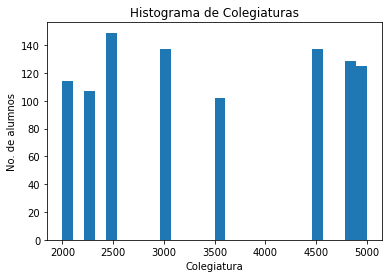

In [22]:
import matplotlib.pyplot as plt 

plt.hist( df3.colegiatura ,bins=28)
plt.title('Histograma de Colegiaturas')
plt.xlabel('Colegiatura')
plt.ylabel('No. de alumnos')
plt.show()

## Filtrado de información con pandas:

In [12]:
# Registros de alumnos sin apellido:
df3[ df3.apellido.values == None ]

,nombre,apellido,email,colegiatura,fecha_incorporacion,tutor_id,carrera,vigente
3,Leanna,None,ldusey3@ebay.co.uk,2000.0,2018-02-05 17:28:38,14,Educación,1
6,Charline,None,cwatts6@google.it,3000.0,2020-08-31 19:21:03,25,Criminología,1
8,Terencio,None,twadhams8@dot.gov,5000.0,2020-04-08 04:46:33,22,Electricidad y generación de energía,0
21,Ashien,None,aromel@bluehost.com,5000.0,2017-09-15 15:46:56,30,Tecnologías de la información y comunicación,1
22,Magdalen,None,mcalltonem@cpanel.net,2000.0,2020-04-08 08:08:43,17,Criminología,1
...,...,...,...,...,...,...,...,...
947,Gelya,None,gbourdasqb@wordpress.com,4500.0,2019-06-24 21:47:40,16,"Negocios y administración, programas multidisc...",1
951,Dev,None,dmeckiffqf@about.com,4800.0,2017-09-17 15:09:30,30,Construcción e ingeniería civil,0
980,Phillis,None,pmcilwreathr8@rambler.ru,3000.0,2018-12-17 08:00:41,27,"Didáctica, pedagogía y currículo",1
988,Bren,None,bbrecknallrg@shutterfly.com,2500.0,2018-08-21 19:53:24,12,"Didáctica, pedagogía y currículo",1


In [13]:
# Otra forma de detectar campos vacíos
df3[ df3['apellido'].isnull() ]

,nombre,apellido,email,colegiatura,fecha_incorporacion,tutor_id,carrera,vigente
3,Leanna,None,ldusey3@ebay.co.uk,2000.0,2018-02-05 17:28:38,14,Educación,1
6,Charline,None,cwatts6@google.it,3000.0,2020-08-31 19:21:03,25,Criminología,1
8,Terencio,None,twadhams8@dot.gov,5000.0,2020-04-08 04:46:33,22,Electricidad y generación de energía,0
21,Ashien,None,aromel@bluehost.com,5000.0,2017-09-15 15:46:56,30,Tecnologías de la información y comunicación,1
22,Magdalen,None,mcalltonem@cpanel.net,2000.0,2020-04-08 08:08:43,17,Criminología,1
...,...,...,...,...,...,...,...,...
947,Gelya,None,gbourdasqb@wordpress.com,4500.0,2019-06-24 21:47:40,16,"Negocios y administración, programas multidisc...",1
951,Dev,None,dmeckiffqf@about.com,4800.0,2017-09-17 15:09:30,30,Construcción e ingeniería civil,0
980,Phillis,None,pmcilwreathr8@rambler.ru,3000.0,2018-12-17 08:00:41,27,"Didáctica, pedagogía y currículo",1
988,Bren,None,bbrecknallrg@shutterfly.com,2500.0,2018-08-21 19:53:24,12,"Didáctica, pedagogía y currículo",1


In [14]:
# Registros de alumnos con apellido:
df3[ df3.apellido.values != None ]

,nombre,apellido,email,colegiatura,fecha_incorporacion,tutor_id,carrera,vigente
0,Wanda,Billington,wbillington0@nsw.gov.au,5000.0,2020-05-17 22:49:29,9,"Ingeniería industrial, mecánica, electrónica y...",1
1,Blayne,Wakeley,bwakeley1@google.cn,2500.0,2018-09-01 17:51:49,26,"Formación docente para educación básica, nivel...",0
2,Hilde,Matiewe,hmatiewe2@hibu.com,2300.0,2020-07-18 00:03:21,25,"Didáctica, pedagogía y currículo",1
4,Maire,Garnall,mgarnall4@artisteer.com,4800.0,2020-08-04 03:43:57,7,Ciencias de la información,1
5,Nikolaus,Freeborn,nfreeborn5@yandex.ru,2000.0,2019-06-05 07:45:19,13,Ingeniería mecánica y metalurgia,1
...,...,...,...,...,...,...,...,...
994,Elihu,O'Shevlin,eoshevlinrm@who.int,5000.0,2017-12-26 00:44:24,18,Construcción e ingeniería civil,0
995,Lilla,Boullen,lboullenrn@europa.eu,5000.0,2018-07-18 17:53:39,8,Derecho,1
996,Cele,Carrigan,ccarriganro@google.fr,2300.0,2020-08-27 04:53:43,23,Comunicación y periodismo,0
997,Bibby,Clingoe,bclingoerp@histats.com,4800.0,2018-05-02 11:20:09,20,"Ingeniería de vehículos de motor, barcos y aer...",0


In [15]:
# Registros de alumnos con apellido:
df3[ df3['apellido'].notnull() ]

,nombre,apellido,email,colegiatura,fecha_incorporacion,tutor_id,carrera,vigente
0,Wanda,Billington,wbillington0@nsw.gov.au,5000.0,2020-05-17 22:49:29,9,"Ingeniería industrial, mecánica, electrónica y...",1
1,Blayne,Wakeley,bwakeley1@google.cn,2500.0,2018-09-01 17:51:49,26,"Formación docente para educación básica, nivel...",0
2,Hilde,Matiewe,hmatiewe2@hibu.com,2300.0,2020-07-18 00:03:21,25,"Didáctica, pedagogía y currículo",1
4,Maire,Garnall,mgarnall4@artisteer.com,4800.0,2020-08-04 03:43:57,7,Ciencias de la información,1
5,Nikolaus,Freeborn,nfreeborn5@yandex.ru,2000.0,2019-06-05 07:45:19,13,Ingeniería mecánica y metalurgia,1
...,...,...,...,...,...,...,...,...
994,Elihu,O'Shevlin,eoshevlinrm@who.int,5000.0,2017-12-26 00:44:24,18,Construcción e ingeniería civil,0
995,Lilla,Boullen,lboullenrn@europa.eu,5000.0,2018-07-18 17:53:39,8,Derecho,1
996,Cele,Carrigan,ccarriganro@google.fr,2300.0,2020-08-27 04:53:43,23,Comunicación y periodismo,0
997,Bibby,Clingoe,bclingoerp@histats.com,4800.0,2018-05-02 11:20:09,20,"Ingeniería de vehículos de motor, barcos y aer...",0


In [16]:
## Primeros Resgistros cuyo tutor_id = 7 
# .head() #<-- extrae los primeros 5 registros
df3[ df3.tutor_id.values == 7 ].head()

,nombre,apellido,email,colegiatura,fecha_incorporacion,tutor_id,carrera,vigente
4,Maire,Garnall,mgarnall4@artisteer.com,4800.0,2020-08-04 03:43:57,7,Ciencias de la información,1
56,Lane,Antley,lantley1k@tamu.edu,5000.0,2018-02-24 22:37:18,7,Ciencias políticas,1
104,Titos,MacGragh,tmacgragh2w@paginegialle.it,2000.0,2018-06-16 00:15:02,7,Administración y gestión de empresas,0
105,Dennison,Whorlton,dwhorlton2x@si.edu,2500.0,2020-08-01 04:00:35,7,Formación docente para la enseñanza de asignat...,1
120,Selle,Stoffler,sstoffler3c@go.com,4800.0,2019-01-17 17:04:37,7,Arquitectura y urbanismo,0


In [17]:
## Resgistros cuya colegiatura fue de $3000 a $3500:
# .head() #<-- extrae los primeros 5 registros
df3[ ( df3.colegiatura.values >= 3000 )&( df3.colegiatura.values <= 3500) ].head()

,nombre,apellido,email,colegiatura,fecha_incorporacion,tutor_id,carrera,vigente
6,Charline,None,cwatts6@google.it,3000.0,2020-08-31 19:21:03,25,Criminología,1
11,Billi,Mattinson,bmattinsonb@abc.net.au,3000.0,2019-10-16 02:26:17,14,"Formación docente para educación física, artís...",1
19,Adrienne,Thompson,athompsonj@comcast.net,3500.0,2020-07-15 02:53:20,8,Educación,1
23,Veriee,Sealey,vsealeyn@dailymotion.com,3000.0,2019-03-29 03:06:25,3,Administración y gestión de empresas,0
42,Elizabeth,Aspel,easpel16@360.cn,3000.0,2019-03-25 22:55:50,19,"Manufacturas y procesos, programas multidiscip...",1
